# CNN VGG16的结构提取图像特征，然后建立MLP模型

In [18]:
# load the data
from keras.utils import load_img, img_to_array
img_path = './data/dog_cat/test/1.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
type(img)

numpy.ndarray

In [19]:
# establish the model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_vgg = VGG16(weights='imagenet', include_top=False)
x = np.expand_dims(img, axis = 0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


In [20]:
# 特征提取
features = model_vgg.predict(x)
print(features.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
(1, 7, 7, 512)


In [21]:
# flatter
features = features.reshape(1,7*7*512)
print(features.shape)

(1, 25088)


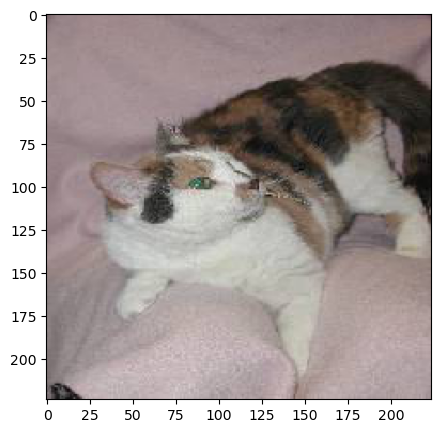

In [22]:
# visulize the data
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5,5))
img1 = load_img(img_path,target_size=(224,224))
plt.imshow(img1)
plt.show()

In [37]:
# load image and preprocess it with VGG16 structure
from keras.utils import load_img,img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np

model_vgg =  VGG16(weights='imagenet', include_top=False)

# define a method to load and preprocess the image
def modelProcess(img_path, model):
    img = load_img(img_path,target_size=(224,224))
    img = img_to_array(img)
    x = np.expand_dims(img, axis = 0)
    x = preprocess_input(x)
    x_vgg = model.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    return x_vgg
# list the name of the training datasets 
import os
folder = "data/dog_cat/train_less/cat_less"
dirs = os.listdir(folder)
img_path = []
for i in dirs:
    if os.path.splitext(i)[1] == ".jpg":
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]
# process the img
features1 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    features_i = modelProcess(img_path[i], model_vgg)
    print('Preprocessed:',img_path[i])
    features1[i] = features_i





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Preprocessed: data/dog_cat/train_less/cat_less//cat.4157.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Preprocessed: data/dog_cat/train_less/cat_less//cat.4143.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Preprocessed: data/dog_cat/train_less/cat_less//cat.4194.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Preprocessed: data/dog_cat/train_less/cat_less//cat.4180.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Preprocessed: data/dog_cat/train_less/cat_less//cat.4023.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Preprocessed: data/dog_cat/train_less/cat_less//cat.4037.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Preprocessed: data/dog_cat/train_less/cat_less//cat.4209.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Preprocessed: data/dog_cat/train_less/cat_less//cat.4208.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Preprocessed: data/dog_cat/train_less/cat_less//cat.4036.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Preprocessed: data/dog_cat/train_less/cat_less//cat.4022.jpg
1/1 ━━━━━

In [38]:
# process the cats
folder = "data/dog_cat/train_less/dog_less/"
dirs = os.listdir(folder)
img_path = []
for i in dirs:
    if os.path.splitext(i)[1] == ".jpg":
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]
# process the img
features2 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    features_i = modelProcess(img_path[i], model_vgg)
    print('Preprocessed:',img_path[i])
    features2[i] = features_i
# label the results
print(features2.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Preprocessed: data/dog_cat/train_less/dog_less///dog.4039.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Preprocessed: data/dog_cat/train_less/dog_less///dog.4005.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Preprocessed: data/dog_cat/train_less/dog_less///dog.4011.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Preprocessed: data/dog_cat/train_less/dog_less///dog.4010.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Preprocessed: data/dog_cat/train_less/dog_less///dog.4004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Preprocessed: data/dog_cat/train_less/dog_less///dog.4038.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Preprocessed: data/dog_cat/train_less/dog_less///dog.4012.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Preprocessed: data/dog_cat/train_less/dog_less///dog.4006.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Preprocessed: data/dog_cat/train_less/dog_less///dog.4007.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Preprocessed: data/dog_cat/train_less/dog_less///dog.4013.jpg


In [40]:
# label the results
print(features1.shape,features2.shape)
y1 = np.zeros(216)
y2 = np.ones(115)

#generate the training data
x = np.concatenate((features1, features2),axis = 0)
y = np.concatenate((y1,y2), axis = 0)
y = y.reshape(-1,1)
print(x.shape,y.shape)

(216, 25088) (115, 25088)
(331, 25088) (331, 1)


In [41]:
# split the training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3, random_state=50)
print(x_train.shape, x_test.shape,y_train.shape)

(231, 25088) (100, 25088) (231, 1)


In [42]:
# set up the mlp model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units = 10, activation = 'relu', input_dim=25088))
model.add(Dense(units=1, activation = 'sigmoid'))
model.summary()

/opt/anaconda3/envs/AI/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │       250,890 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,901 (980.08 KB)

 Trainable params: 250,901 (980.08 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# config the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5541 - loss: 5.8122  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4892 - loss: 0.6365
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 0.6311
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 0.6273
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 0.6260
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 0.6209
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 0.6173
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 0.5977
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 0.4795
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 0.3908
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 0.2694
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 0.2628
Epoch 13/50

In [44]:
# evaluate the accuracy
from sklearn.metrics import accuracy_score
y_train_predict = model.predict(x_train)
y_train_predict = np.round(y_train_predict)
print(y_train_predict.shape)
print(y_train.shape)

accurancy_train = accuracy_score(y_train_predict,y_train)
print(accurancy_train)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(231, 1)
(231, 1)
0.9956709956709957


In [45]:
# evaluate the test data accurancy
y_test_predict = model.predict(x_test)
y_test_predict = np.round(y_test_predict)
accurancy_test = accuracy_score(y_test_predict,y_test)
print(accurancy_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
0.96


In [46]:
# test the image
img_path = 'cat.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
x = np.expand_dims(img, axis = 0)
x = preprocess_input(x)
features = model_vgg.predict(x)
features = features.reshape(1,7*7*512)
result = model.predict(features)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[[4.1333186e-07]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[1.]]
1/1 ━━━━━━━━━━

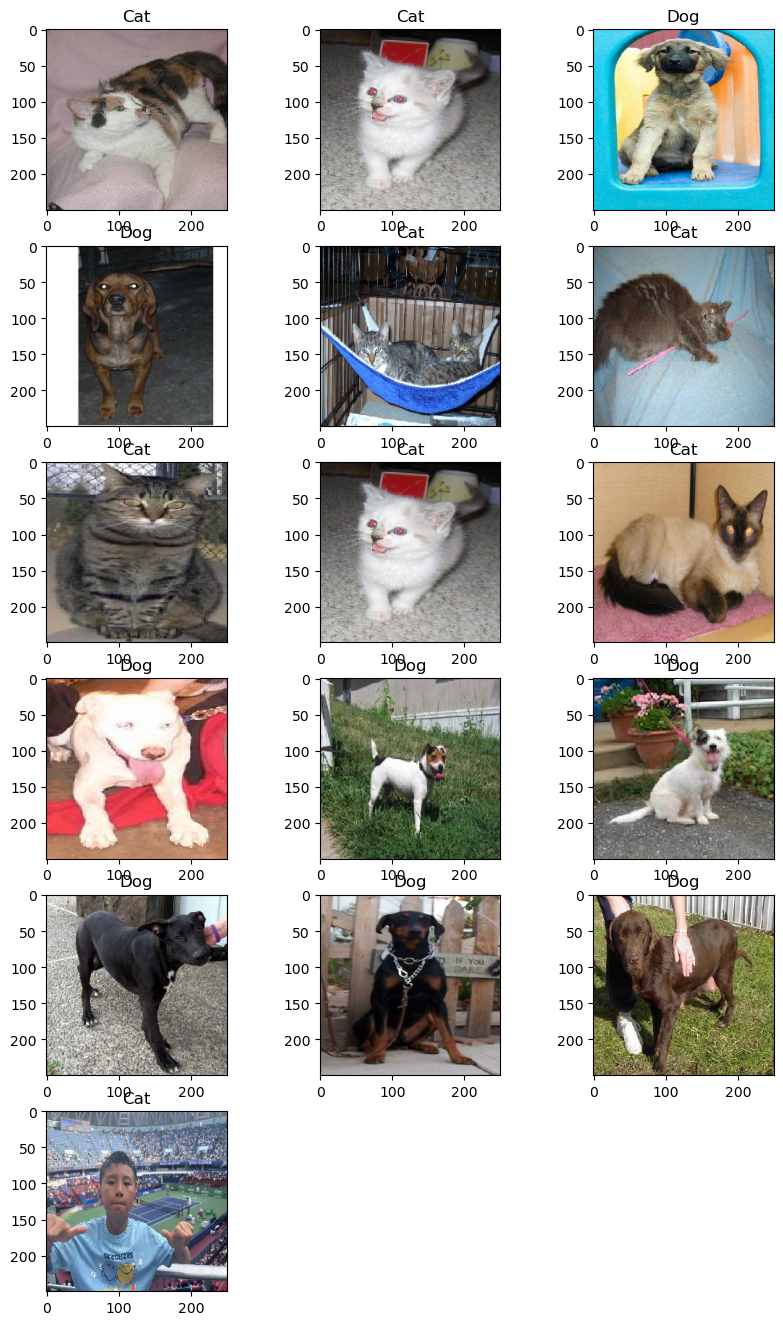

In [48]:
# predict on multiple images
import matplotlib as mlp
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.utils import load_img, img_to_array
from keras.models import load_model
a = [i for i in range(1,17)]
fig = plt.figure(figsize=(10,140))
for i in a:
    img_name = './data/dog_cat/test/'+ str(i) + '.jpg'
    img_ori = load_img(img_name,target_size=(224,224))
    img = img_to_array(img_ori)
    x = np.expand_dims(img, axis = 0)
    x = preprocess_input(x)
    features = model_vgg.predict(x)
    features = features.reshape(1,7*7*512)
    result = model.predict(features)
    result = np.round(result)
    img_ori = load_img(img_name,target_size=(250,250))
    plt.subplot(50,3,i)
    plt.imshow(img_ori)
    print(result)
    #plt.title(result)
    plt.title('Dog' if result[0] == 1 else 'Cat' )
plt.show()